### Python ile Mekansal Veri İşlemeye Giriş


Kullanacağımız araçlar

Anaconda https://www.anaconda.com/distribution/#windows
Spyder
Jupyter Notebook
Github
geopandas
numpy

Spyder bir bilimsel entegre geliştirme ortamıdır.

Jupyter Notebook 

Numpy: NumPy, Python programlama dili için bir kütüphane olup, büyük, çok boyutlu diziler ve matrisler için destek eklerken, bu dizilerde çalışmak için yüksek düzeyli matematiksel işlevlerin geniş bir koleksiyonudur

Pandas: Özellikle, sayısal tabloları ve zaman serilerini değiştirmek için veri yapıları ve işlemler sunar

Matplotlib, Python programlama dili ve sayısal matematik uzantısı NumPy için bir çizim kütüphanesidir.

Some videos to watch
https://www.youtube.com/watch?v=wsSEKm-rU6U
https://www.youtube.com/watch?v=cxLht5KN3pQ


# Geopandas
 
packages used in geopandas
Adding geospatial abilities to python
panda - data analysis library, python excel

shapely - geometric shapes library (based on geos)
fiona - reading writing geo (based on ogr)

pyproj - projections (based on proj4)

descartes- mapping visualizations 
matplotlib - visualisation library
geopy - geocoding
rtree - spatial analysis, simple, inside polygon neighboorhod something like that
pysal - spatial analysis functions, advanced, coloring maps
numpy - math library


# Jupyter notebook

In [54]:
#ürettiğimiz figürlerin notebook içinde kalması için
%matplotlib inline

import pandas as pd
import geopandas
import shapely

#bunu sonra yaz
#pd.options.display.max_rows = 10



In [55]:
iller = geopandas.read_file("zip://./data/gadm36_TUR_1.zip")


In [56]:
iller.head()


,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,TUR,Turkey,TUR.1_1,Adana,Seyhan,None,Il,Province,None,TR.AA,"MULTIPOLYGON (((35.20958 36.67875, 35.20958 36..."
1,TUR,Turkey,TUR.2_1,Adiyaman,Adıyaman,None,Il,Province,None,TR.AD,"POLYGON ((38.68339 37.60323, 38.66182 37.59428..."
2,TUR,Turkey,TUR.3_1,Afyon,Afyonkarahisar,None,Il,Province,None,TR.AF,"POLYGON ((30.18261 37.90116, 30.18878 37.89117..."
3,TUR,Turkey,TUR.4_1,Agri,Ağri|Karaköse,None,Il,Province,None,TR.AG,"POLYGON ((43.71635 39.37020, 43.70746 39.36575..."
4,TUR,Turkey,TUR.5_1,Aksaray,None,None,Il,Province,None,TR.AK,"POLYGON ((34.39513 38.19467, 34.39626 38.18270..."


In [57]:
iller.geometry


0     MULTIPOLYGON (((35.20958 36.67875, 35.20958 36...
1     POLYGON ((38.68339 37.60323, 38.66182 37.59428...
2     POLYGON ((30.18261 37.90116, 30.18878 37.89117...
3     POLYGON ((43.71635 39.37020, 43.70746 39.36575...
4     POLYGON ((34.39513 38.19467, 34.39626 38.18270...
                            ...                        
76    POLYGON ((29.57592 38.19177, 29.56290 38.19193...
77    POLYGON ((44.49154 38.30873, 44.49103 38.30837...
78    POLYGON ((29.03236 40.47859, 29.03236 40.47847...
79    POLYGON ((35.96196 39.91003, 35.96333 39.90491...
80    POLYGON ((31.49785 41.05423, 31.46466 41.05458...
Name: geometry, Length: 81, dtype: geometry

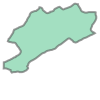

In [58]:
iller.geometry[2]

In [59]:
iller.NAME_1[2]

'Afyon'

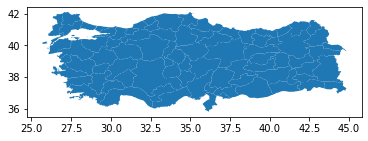

In [60]:
iller.plot()

In [61]:
type(iller)

geopandas.geodataframe.GeoDataFrame

In [62]:
type(iller.geometry)

geopandas.geoseries.GeoSeries

In [63]:
iller.geometry.area

0     1.612729
1     0.759168
2     1.525553
3     1.079759
4     0.786662
        ...   
76    0.508203
77    2.179277
78    0.069144
79    1.380989
80    0.328679
Length: 81, dtype: float64

In [64]:
iller.geometry.centroid

0     POINT (35.59445 37.46170)
1     POINT (38.33526 37.80429)
2     POINT (30.65645 38.62266)
3     POINT (43.26693 39.57460)
4     POINT (33.84149 38.37142)
                ...            
76    POINT (29.36163 38.53510)
77    POINT (43.63811 38.47572)
78    POINT (29.11771 40.58542)
79    POINT (35.25198 39.66226)
80    POINT (31.84013 41.25204)
Length: 81, dtype: geometry

In [65]:
merkezler = iller.geometry.centroid

In [66]:
type(merkezler)

geopandas.geoseries.GeoSeries

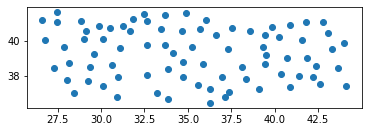

In [67]:
merkezler.plot()

Buraya nüfus verisi geldikten sorna toplama, min, max gibi analizler gelecek

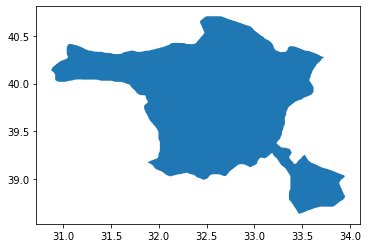

In [68]:
ankara = iller[iller['NAME_1'] == 'Ankara']
ankara.plot()

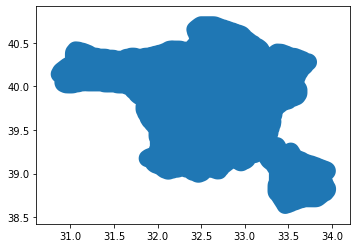

In [69]:
ankara.geometry.buffer(0.1).plot()

In [70]:
print(iller.geometry[2])

POLYGON ((30.18260765 37.90116119, 30.18877983 37.89116669, 30.19455528 37.87817383, 30.20171165 37.86721802, 30.20336914 37.86224747, 30.20322037 37.85691071, 30.20240211 37.85427475, 30.19958305 37.84968567, 30.19576836 37.84552002, 30.18296242 37.83351517, 30.17936516 37.82926941, 30.17322731 37.81985474, 30.16710472 37.81391525, 30.15939522 37.80923462, 30.14717865 37.80464172, 30.14159584 37.80192947, 30.12265587 37.79015732, 30.11733055 37.78725433, 30.09053612 37.77673721, 30.08443451 37.77466583, 30.07670021 37.77315903, 30.06460381 37.77222443, 30.04808426 37.77201462, 30.0104866 37.77233887, 30.00001907 37.77882004, 29.99415016 37.78136063, 29.99046516 37.78240967, 29.97886086 37.78396988, 29.96699905 37.78396606, 29.95919991 37.78321457, 29.95171165 37.78167343, 29.93702698 37.7762146, 29.92678261 37.77380753, 29.91152573 37.77270889, 29.88035393 37.77232742, 29.86898994 37.77126312, 29.86532784 37.77055359, 29.85874748 37.76844406, 29.85312271 37.76565552, 29.84527397 37.76

### Ders 2 - Reading Other Types of Data such as point and line

In [71]:
havalimanlari = geopandas.read_file("zip://./data/ne_10m_airports.zip")
sehirler = geopandas.read_file("zip://./data/ne_10m_populated_places.zip")
tren = geopandas.read_file("zip://./data/ne_10m_railroads.zip")
nehirler = geopandas.read_file("zip://./data/ne_10m_rivers_lake_centerlines.zip")

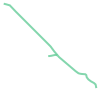

In [72]:
nehirler.geometry[1]

In [73]:
print(nehirler.geometry[1])

MULTILINESTRING ((103.6874292326879 13.22467682499403, 103.7133895191462 13.21828847863988, 103.7487899097712 13.20795319218153, 103.8085229826879 13.14512767134821, 104.1557723316462 12.79779694218153, 104.1914168628962 12.74909088749403, 104.2251082691462 12.70925527551488), (104.2251082691462 12.70925527551488, 104.2007755868545 12.71283600468153, 104.1635034514379 12.70416901249403, 104.1436466806045 12.70123932499403, 104.1323348316462 12.70111725468153), (104.2251082691462 12.70925527551488, 104.2404891285212 12.69102610884821, 104.4047957691462 12.55129629113988, 104.4340112639379 12.52989329634821, 104.4454044931045 12.52631256718153, 104.4620060556045 12.52301666874403, 104.5038354826879 12.51935455936903, 104.5122990243545 12.51178619999403, 104.5173445972712 12.48944733280653, 104.5333764983129 12.46832916874403, 104.5595809253962 12.44843170780653, 104.5893660816462 12.43231842655653, 104.6054793628962 12.41742584843153, 104.6090600920629 12.40253327030653, 104.612803581646

In [74]:
print(tren.geometry[1])

LINESTRING (30.73027527777777 69.44805444444444, 30.72472555555555 69.4502786111111, 30.70444333333333 69.45055555555555, 30.68639083333333 69.44833361111111, 30.67055527777778 69.44527833333332, 30.65028027777778 69.44388944444444, 30.64657111111111 69.44411805555555, 30.62873611111111 69.44240388888888, 30.61545444444445 69.44099722222222, 30.59879166666667 69.44176944444445, 30.58702444444444 69.44314999999999, 30.56922722222222 69.44343611111111, 30.55567694444444 69.44208722222221, 30.53658333333333 69.43788277777777, 30.52578722222222 69.4357361111111, 30.50347055555556 69.43408444444444, 30.50000027777778 69.43423305555555, 30.48041777777777 69.43507194444443, 30.45336166666666 69.4368086111111, 30.43055333333333 69.43690916666667, 30.40560972222222 69.43559999999999, 30.37440222222222 69.43406944444445, 30.35823722222222 69.43305972222223, 30.3383125 69.43191805555554, 30.31250027777777 69.42923194444444, 30.28719833333333 69.42478166666666, 30.2650325 69.42266333333333, 30.251

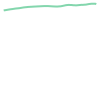

In [75]:
tren.geometry[1]

### Koordinat Sistemleri

In [76]:
iller.crs

{'init': 'epsg:4326'}

Reprojection For example, let's convert the countries to the World Mercator projection (http://epsg.io/3395):

In [77]:
iller_mercator = iller.to_crs(epsg=3395)  

C:\Users\uzayuzal\Anaconda3\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


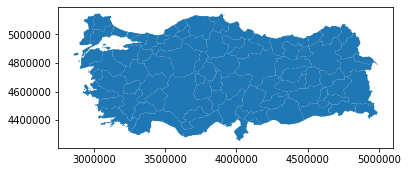

In [78]:
iller_mercator.plot()

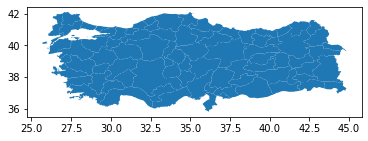

In [79]:
iller.plot()

### Katmanları üst üste görüntüleme

[(35, 43), (25, 45)]

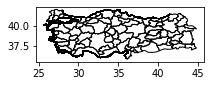

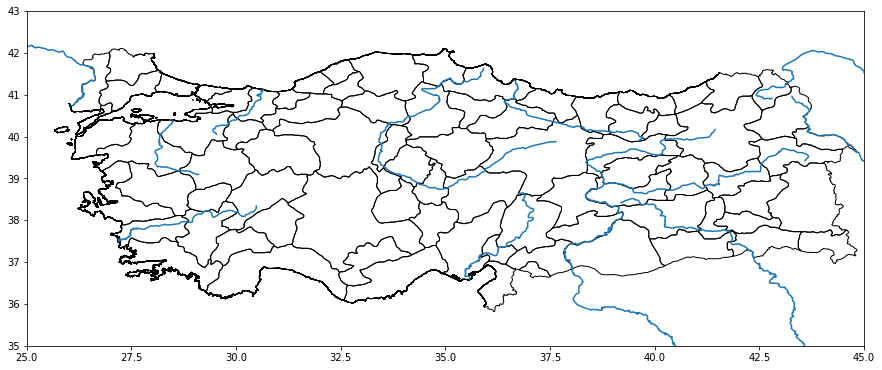

In [80]:
ax = iller.plot(edgecolor='k', facecolor='none', figsize=(3, 5))

ax = iller.plot(edgecolor='k', facecolor='none', figsize=(15, 10))

nehirler.plot(ax=ax)
#sehirler.plot(ax=ax, color='red')
ax.set(xlim=(25, 45), ylim=(35, 43))

### Ders 2 - Mekansal İlişkiler ve Operasyonlar

In [81]:
%matplotlib inline

import pandas as pd
import geopandas

pd.options.display.max_rows = 10

https://en.wikipedia.org/wiki/Spatial_relation

In [82]:
#Veri setlerini yükle

havalimanlari = geopandas.read_file("zip://./data/ne_10m_airports.zip")
sehirler = geopandas.read_file("zip://./data/ne_10m_populated_places.zip")
tren = geopandas.read_file("zip://./data/ne_10m_railroads.zip")
nehirler = geopandas.read_file("zip://./data/ne_10m_rivers_lake_centerlines.zip")
iller = geopandas.read_file("zip://./data/gadm36_TUR_1.zip")

sehirler.head()

,SCALERANK,NATSCALE,LABELRANK,FEATURECLA,NAME,NAMEPAR,NAMEALT,DIFFASCII,NAMEASCII,ADM0CAP,...,name_ja,name_ko,name_nl,name_pl,name_sv,name_tr,name_vi,wdid_score,ne_id,geometry
0,10,1,8,Admin-1 capital,Colonia del Sacramento,None,None,0,Colonia del Sacramento,0.0,...,コロニア・デル・サクラメント,콜로니아델사크라멘토,Colonia del Sacramento,Colonia del Sacramento,Colonia del Sacramento,Colonia del Sacramento,Colonia del Sacramento,4,1159112629,POINT (-57.84000 -34.48000)
1,10,1,8,Admin-1 capital,Trinidad,None,None,0,Trinidad,0.0,...,トリニダ,트리니다드,Trinidad,Trinidad,Trinidad,Trinidad,Trinidad,4,1159112647,POINT (-56.90100 -33.54400)
2,10,1,8,Admin-1 capital,Fray Bentos,None,None,0,Fray Bentos,0.0,...,フライ・ベントス,프라이벤토스,Fray Bentos,Fray Bentos,Fray Bentos,Fray Bentos,Fray Bentos,4,1159112663,POINT (-58.30400 -33.13900)
3,10,1,8,Admin-1 capital,Canelones,None,None,0,Canelones,0.0,...,カネローネス,카넬로네스,Canelones,Canelones,Canelones,Canelones,Canelones,4,1159112679,POINT (-56.28400 -34.53800)
4,10,1,8,Admin-1 capital,Florida,None,None,0,Florida,0.0,...,フロリダ,플로리다,Florida,Florida,Florida,Flordia,Florida,4,1159112703,POINT (-56.21500 -34.09900)


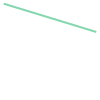

In [83]:
#creating a polygon
ankara = iller.loc[iller['NAME_1'] == 'Ankara', 'geometry'].squeeze()
#creating a linestring for tests
ankaraC = sehirler.loc[sehirler['NAME'] == 'Ankara', 'geometry'].squeeze()
istanbulC = sehirler.loc[sehirler['NAME'] == 'Istanbul', 'geometry'].squeeze()

#create a line with ankara and istanbul
from shapely.geometry import LineString
line = LineString([ankaraC, istanbulC])

line

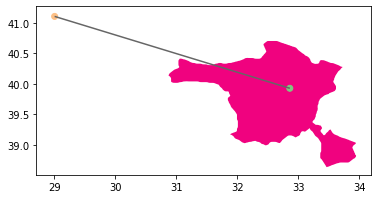

In [84]:
#plotting all together to check data if suitable for spatial relations tests
geopandas.GeoSeries([ankaraC, istanbulC, ankara, line]).plot(cmap='Accent')

In [85]:
ankaraC.within(ankara)

True

In [86]:
ankara.contains(ankaraC)

True

In [87]:
ankara.contains(istanbulC)

False

In [88]:
ankara.contains(line)

False

In [89]:
ankara.intersects(line)

True

In [90]:
#Spatial relationships with GeoDataFrames

iller.contains(istanbulC)

0     False
1     False
2     False
3     False
4     False
      ...  
76    False
77    False
78    False
79    False
80    False
Length: 81, dtype: bool

In [91]:
# we took a boolean result, lets filter it
iller[iller.contains(istanbulC)]

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
39,TUR,Turkey,TUR.40_1,Istanbul,İstanbul|Constantinople|Estambul|Istambul|Kons...,None,Il,Province,None,TR.IB,"MULTIPOLYGON (((29.11403 40.82069, 29.11403 40..."


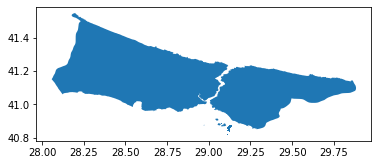

In [92]:
# select istanbul and plot
iller[iller.contains(istanbulC)].plot()

In [93]:
nehirler.head()

,dissolve,scalerank,featurecla,name,name_alt,rivernum,note,min_zoom,name_en,min_label,...,name_pl,name_pt,name_ru,name_sv,name_tr,name_vi,name_zh,wdid_score,ne_id,geometry
0,0River,1.0,River,Irrawaddy Delta,None,0,None,2.0,Irrawaddy,3.0,...,Irawadi,Rio Irauádi,Иравади,Irrawaddy,İravadi Nehri,Sông Ayeyarwaddy,伊洛瓦底江,2,1159109417,"MULTILINESTRING ((95.45110 17.82050, 95.42766 ..."
1,1001Lake Centerline,9.0,Lake Centerline,Tonle Sap,None,1001,None,7.1,None,8.1,...,Tonle Sap,None,Тонлесап,None,None,None,None,4,1159109429,"MULTILINESTRING ((103.68743 13.22468, 103.7133..."
2,1001River,9.0,River,Tonle Sap,None,1001,None,7.1,None,8.1,...,Tonle Sap,None,Тонлесап,None,None,None,None,4,1159109445,"LINESTRING (104.61476 12.38203, 104.61769 12.3..."
3,1002Lake Centerline,9.0,Lake Centerline,Sheksna,None,1002,None,7.1,Sheksna,8.1,...,Szeksna,None,Шексна,Sjeksna,None,None,舍克斯納河,4,1159109447,"LINESTRING (37.73951 59.07954, 37.75733 59.103..."
4,1002River,9.0,River,Sheksna,None,1002,None,7.1,Sheksna,8.1,...,Szeksna,None,Шексна,Sjeksna,None,None,舍克斯納河,4,1159109461,"LINESTRING (38.47804 59.21666, 38.48528 59.228..."


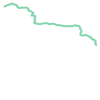

In [94]:
#lets select dicle river
dicle = nehirler[nehirler['name'] == 'Dicle'].geometry.squeeze()
dicle

In [95]:
#diclenin kestiği iller
iller[iller.crosses(dicle)]  # or .intersects

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
13,TUR,Turkey,TUR.14_1,Batman,None,None,Il,Province,None,TR.BM,"POLYGON ((41.65804 37.65389, 41.64595 37.64524..."
25,TUR,Turkey,TUR.26_1,Diyarbakir,Diyarbakır,None,Il,Province,None,TR.DY,"POLYGON ((39.57993 37.89192, 39.55878 37.90680..."
28,TUR,Turkey,TUR.29_1,Elazığ,Elazig,None,Il,Province,None,TR.EG,"POLYGON ((39.11914 38.33826, 39.10740 38.33697..."
56,TUR,Turkey,TUR.57_1,Mardin,None,None,Il,Province,None,TR.MR,"POLYGON ((40.85432 37.10750, 40.85352 37.10732..."
68,TUR,Turkey,TUR.69_1,Siirt,None,None,Il,Province,None,TR.SI,"POLYGON ((41.87389 37.74025, 41.87281 37.75165..."
70,TUR,Turkey,TUR.71_1,Sirnak,Şırnak,None,Il,Province,None,TR.SR,"POLYGON ((42.45850 37.13239, 42.45372 37.12970..."


In [96]:
iller[iller.intersects(dicle)]  # or .intersects

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
13,TUR,Turkey,TUR.14_1,Batman,None,None,Il,Province,None,TR.BM,"POLYGON ((41.65804 37.65389, 41.64595 37.64524..."
25,TUR,Turkey,TUR.26_1,Diyarbakir,Diyarbakır,None,Il,Province,None,TR.DY,"POLYGON ((39.57993 37.89192, 39.55878 37.90680..."
28,TUR,Turkey,TUR.29_1,Elazığ,Elazig,None,Il,Province,None,TR.EG,"POLYGON ((39.11914 38.33826, 39.10740 38.33697..."
56,TUR,Turkey,TUR.57_1,Mardin,None,None,Il,Province,None,TR.MR,"POLYGON ((40.85432 37.10750, 40.85352 37.10732..."
68,TUR,Turkey,TUR.69_1,Siirt,None,None,Il,Province,None,TR.SI,"POLYGON ((41.87389 37.74025, 41.87281 37.75165..."
70,TUR,Turkey,TUR.71_1,Sirnak,Şırnak,None,Il,Province,None,TR.SR,"POLYGON ((42.45850 37.13239, 42.45372 37.12970..."


###  Mekansal operasyonlar

https://shapely.readthedocs.io/en/stable/manual.html#spatial-analysis-methods

In [97]:
anitkabir = ankara.centroid

In [98]:
print(anitkabir)

POINT (32.61693629826807 39.79575415554407)


https://shapely.readthedocs.io/en/stable/manual.html#object.minimum_rotated_rectangle

In [99]:
dicleBBOX = dicle.minimum_rotated_rectangle

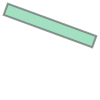

In [100]:
dicleBBOX

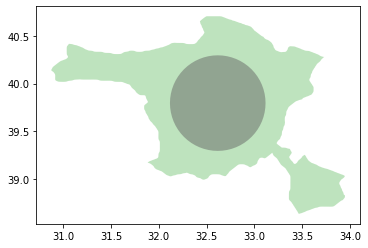

In [101]:
geopandas.GeoSeries([ankara, anitkabir.buffer(0.5)]).plot(alpha=0.5, cmap='Accent')

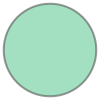

In [102]:
anitkabir.buffer(0.5).intersection(ankara)

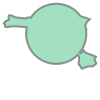

In [103]:
anitkabir.buffer(1).union(ankara)

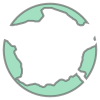

In [104]:
anitkabir.buffer(1).difference(ankara)

### Ders 3 - Spatial joins

In [105]:

#Veri setlerini yükle

havalimanlari = geopandas.read_file("zip://./data/ne_10m_airports.zip")
sehirler = geopandas.read_file("zip://./data/ne_10m_populated_places.zip")
tren = geopandas.read_file("zip://./data/ne_10m_railroads.zip")
nehirler = geopandas.read_file("zip://./data/ne_10m_rivers_lake_centerlines.zip")
iller = geopandas.read_file("zip://./data/tr_iller/gadm36_TUR_1.zip")
ulkeler = geopandas.read_file("zip://./data/ne_110m_admin_0_countries.zip")

iller.head()

,NAME_1,alan,geometry
0,Adana,1.583493e+10,"MULTIPOLYGON (((35.20958 36.67875, 35.20958 36..."
1,Adiyaman,7.420537e+09,"POLYGON ((38.68339 37.60323, 38.66182 37.59428..."
2,Afyon,1.474743e+10,"POLYGON ((30.18261 37.90116, 30.18878 37.89117..."
3,Agri,1.030035e+10,"POLYGON ((43.71635 39.37020, 43.70746 39.36575..."
4,Aksaray,7.630818e+09,"POLYGON ((34.39513 38.19467, 34.39626 38.18270..."


In [106]:
import pandas as pd

In [107]:
# koruyucu aile verisini ekle
df = pd.read_excel('./data/veriseti.xlsx')
print(df)

print(df.head(2))

print(df.columns)



      NAME_1  ToplamCocuk  ToplamKorucuyuAile
0   Istanbul          684                 623
1     Ankara          435                 381
2      Izmir          412                 368
3    Kayseri          282                 251
4    Kocaeli          248                 203
..       ...          ...                 ...
76  Nevsehir            6                   5
77      Kars            5                   2
78   Ardahan            5                   3
79   Bayburt            4                   3
80   Tunceli            3                   2

[81 rows x 3 columns]
     NAME_1  ToplamCocuk  ToplamKorucuyuAile
0  Istanbul          684                 623
1    Ankara          435                 381
Index(['NAME_1', 'ToplamCocuk', 'ToplamKorucuyuAile'], dtype='object')


In [108]:
iller2 = iller.merge(df, on='NAME_1')

In [109]:
iller2.head(100)

,NAME_1,alan,geometry,ToplamCocuk,ToplamKorucuyuAile
0,Adana,1.583493e+10,"MULTIPOLYGON (((35.20958 36.67875, 35.20958 36...",226,166
1,Adiyaman,7.420537e+09,"POLYGON ((38.68339 37.60323, 38.66182 37.59428...",44,31
2,Afyon,1.474743e+10,"POLYGON ((30.18261 37.90116, 30.18878 37.89117...",143,118
3,Agri,1.030035e+10,"POLYGON ((43.71635 39.37020, 43.70746 39.36575...",12,6
4,Aksaray,7.630818e+09,"POLYGON ((34.39513 38.19467, 34.39626 38.18270...",64,46
...,...,...,...,...,...
75,Usak,4.918731e+09,"POLYGON ((29.57592 38.19177, 29.56290 38.19193...",30,24
76,Van,2.110904e+10,"POLYGON ((44.49154 38.30873, 44.49103 38.30837...",32,20
77,Yalova,6.500306e+08,"POLYGON ((29.03236 40.47859, 29.03236 40.47847...",22,18
78,Yozgat,1.315745e+10,"POLYGON ((35.96196 39.91003, 35.96333 39.90491...",37,24


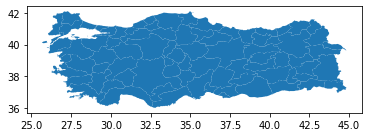

In [110]:
iller2.plot()

### Spatial relationships between objects

In [111]:
turkey = ulkeler.loc[ulkeler['name'] == 'Turkey', 'geometry'].squeeze()

In [112]:
sehirler.within(turkey)

0       False
1       False
2       False
3       False
4       False
        ...  
7338    False
7339    False
7340    False
7341    False
7342    False
Length: 7343, dtype: bool

In [113]:
sehirler[sehirler.within(turkey)]

,SCALERANK,NATSCALE,LABELRANK,FEATURECLA,NAME,NAMEPAR,NAMEALT,DIFFASCII,NAMEASCII,ADM0CAP,...,name_ja,name_ko,name_nl,name_pl,name_sv,name_tr,name_vi,wdid_score,ne_id,geometry
47,10,1,5,Admin-1 capital,Kırklareli,None,None,0,Kirklareli,0.0,...,クルクラーレリ,키르클라렐리,Kırklareli,Kırklareli,Kirklareli,Kırklareli,Kırklareli,4,1159113387,POINT (27.22600 41.74300)
48,10,1,5,Admin-1 capital,Bilecik,None,None,0,Bilecik,0.0,...,ビレジク,빌레지크,Bilecik,Bilecik,Bilecik,Bilecik,Bilecik,4,1159113409,POINT (29.98300 40.15000)
49,10,1,5,Admin-1 capital,Sakarya,None,None,0,Sakarya,0.0,...,アダパザル,아다파자리,Adapazarı,Adapazarı,Adapazarı,Adapazarı,Adapazarı,4,1159113425,POINT (30.40000 40.76666)
50,10,1,5,Admin-1 capital,Kastamonu,None,None,0,Kastamonu,0.0,...,カスタモヌ,카스타모누,Kastamonu,Kastamonu,Kastamonu,Kastamonu,Kastamonu,4,1159113441,POINT (33.78300 41.38900)
51,10,1,5,Admin-1 capital,Burdur,None,None,0,Burdur,0.0,...,ブルドゥル,부르두르,Burdur,Burdur,Burdur,Burdur,Burdur,4,1159113457,POINT (30.28334 37.71666)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6286,4,50,5,Admin-1 capital,Bursa,None,None,0,Bursa,0.0,...,ブルサ,부르사,Bursa,Bursa,Bursa,Bursa,Bursa,4,1159149373,POINT (29.06805 40.20193)
6287,4,50,5,Admin-1 capital,Samsun,None,None,0,Samsun,0.0,...,サムスン,삼순,Samsun,Samsun,Samsun,Samsun,Samsun,4,1159149377,POINT (36.34366 41.28000)
6288,4,50,5,Admin-1 capital,Konya,None,None,0,Konya,0.0,...,コンヤ,코니아,Konya,Konya,Konya,Konya,Konya,4,1159149379,POINT (32.47306 37.87696)
6289,4,50,5,Admin-1 capital,Adana,None,Seyhan,0,Adana,0.0,...,アダナ,아다나,Adana,Adana,Adana,Adana,Adana,4,1159149381,POINT (35.31806 36.99693)


### Spatial join operation


In [114]:
joined = geopandas.sjoin(sehirler, ulkeler, op='within', how='left')
joined
joined['continent'].value_counts()

Asia             1704
North America    1353
Europe           1298
Africa           1222
South America    1005
Oceania           278
Antarctica         11
Name: continent, dtype: int64

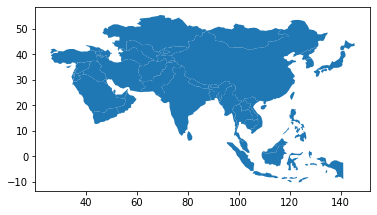

In [115]:
#overlay operation
asia = ulkeler[ulkeler['continent'] == 'Asia']
asia.plot()

In [116]:
sehirler['geometry'] = sehirler.buffer(2)

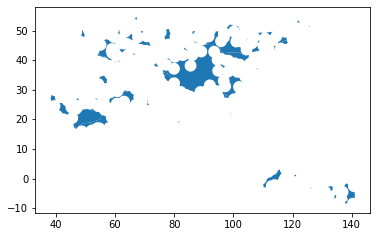

In [117]:
geopandas.overlay(asia, sehirler, how='difference').plot()

### Ders 4 - Görselleştirme Çalışmaları

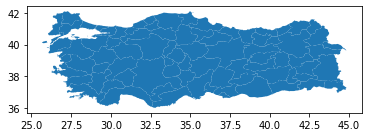

In [118]:
iller2.plot()

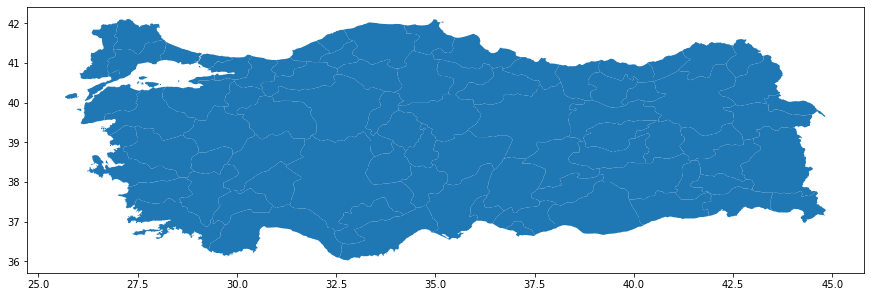

In [119]:
iller2.plot(figsize=(15, 15))

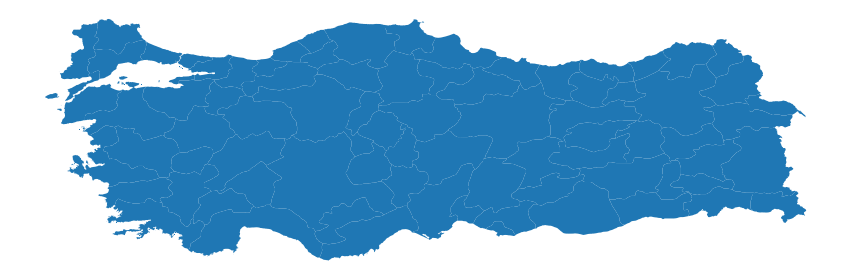

In [120]:
ax = iller2.plot(figsize=(15, 15))
ax.set_axis_off()

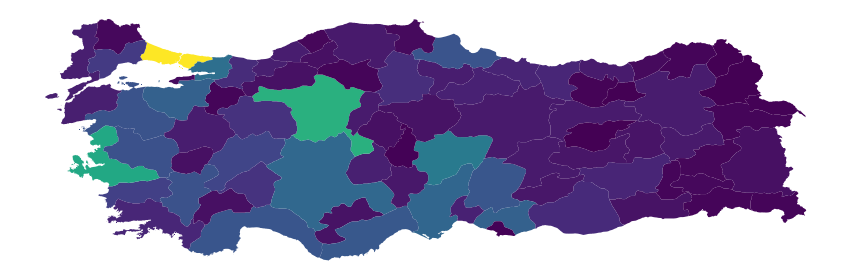

In [121]:
ax = iller2.plot(figsize=(15, 15), column='ToplamCocuk')
ax.set_axis_off()

The 'mapclassify' or 'pysal' package is required to use the 'scheme' keyword

List of colormaps in matplotlib for visualisation https://matplotlib.org/tutorials/colors/colormaps.html

Maybe another course for visualisations

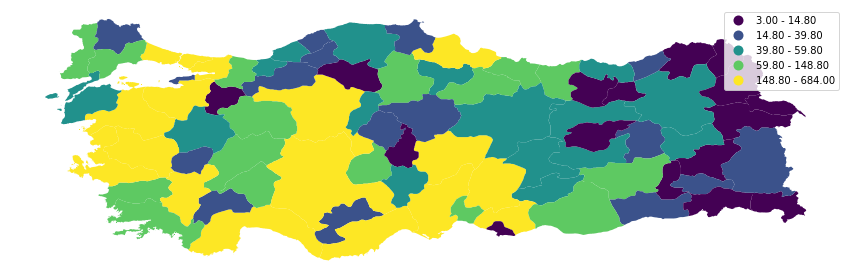

In [122]:
ax = iller2.plot(figsize=(15, 15), column='ToplamCocuk', scheme='quantiles', legend=True)
ax.set_axis_off()

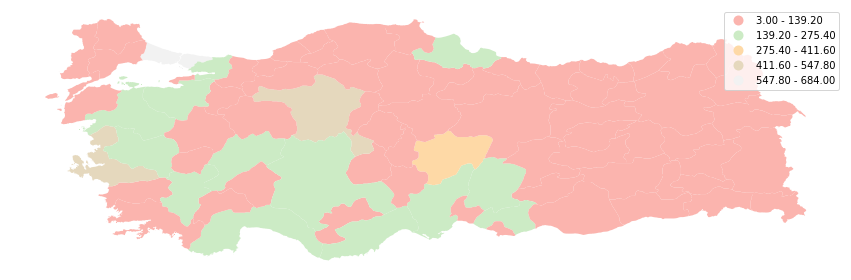

In [123]:
ax = iller2.plot(figsize=(15, 15), column='ToplamCocuk', scheme='equal_interval', legend=True, cmap='Pastel1')
ax.set_axis_off()

In [124]:
ax = iller2.plot(figsize=(15, 15), column='ToplamCocuk', scheme='fisher_jenks', legend=True)

#putting a north arrow
x, y, arrow_length = 0.1, 0.1, 0.1
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax.transAxes)
#ax.set_axis_off()
    ax.set_title("Türkiye'deki Koruyucu Aile'deki Çocuk Sayısı")


IndentationError: unexpected indent (<ipython-input-124-0de7ac99dbc8>, line 10)

Shape olarak kaydetme ve png olarak kaydetme ekle

In [ ]:
iller2.to_file(r'cikti/iller2.shp')


In [ ]:
import matplotlib.pyplot as plt
plt.savefig('cikti/deneme-harita.png')